# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : humanitarian-aid.csv

Problem Statement : Menentukan negara mana yang paling membutuhkan bantuan untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar dengan menggunakan KMeans untuk membuat cluster dalam mengelompokkan negara-negara tersebut yang dilihat dari setidaknya 2 indikator yaitu elbow dan silhoutte score.

Objective: Mengelompokkan negara-negara yang sangat membutuhkan bantuan dalam memerangi kemiskinan dan menyediakan fasilitas bantuan dasar.

# ii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import pickle
import json


# iii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Informasi Data (Deskripsi Kolom)
`country` : Name of the country

`child_mortality` : Death of children under 5 years of age per 1000 live births

`exports`: Export of goods and services. Given as percentage of the Total GDP

`health`: Total health spending as percentage of Total GDP

`imports`: Imports of goods and services. Given as percentage of the Total GDP

`income` : Net income per person

`inflation`: The measurement of the annual growth rate of the Total GDP

`life_expectancy`: The average number of years a new born child would live if the current mortality patterns remain the same

`total_fertility` : The number of children that would be born to each woman if the current age-fertility rates remain the same

`gdpp` : The GDP per capita. Calculated as the Total GDP divided by the total population.

In [2]:
# Load dataset
df_ori = pd.read_csv('humanitarian-aid.csv')

# Duplicate data ori
df = df_ori.copy()

In [3]:
# show 10 data teratas
df.head(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
# show 10 data terakhir
df.tail(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


Terlihat dari tampilan data bahwa data diurutkan berdasarkan abjad nama negara.

In [5]:
# Check Dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Data tersebut memiliki:
- 167 baris data
- 10 kolom
- 7 kolom bertipe float, 2 kolom bertipe integer, dan 1 kolom bertipe object

In [6]:
# Check Dataset 2
df.isnull().sum()

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

Dari hasil tidak terdapat missing value pada setiap kolom

In [7]:
# Check Dataset 3
df.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Mendeskripsi data numerik sejumlah 9 kolom didapatkan nilai count, mean, std, min, 25%, 50%, 75%, dan max dengan rentang yang berbeda.

In [8]:
# Memilih hanya kolom-kolom numerik
numeric_data = df.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

child_mortality    1.450774
exports            2.445824
health             0.705746
imports            1.905276
income             2.231480
inflation          5.154049
life_expectancy   -0.970996
total_fertility    0.967092
gdpp               2.218051
dtype: float64

Skew hanya terdapat pada kolom child_mortality, exports, imports, income, inflation, gdpp.

# iv. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Untuk melihat negara miskin yang membutuhkan bantuan, saya memvisualisasikan dengan melihat kematian anak terbanyak, income terendah, total kelahiran tertinggi, dan harapan hidup terendah dari 10 negara menggunakan data sebelum clustering.

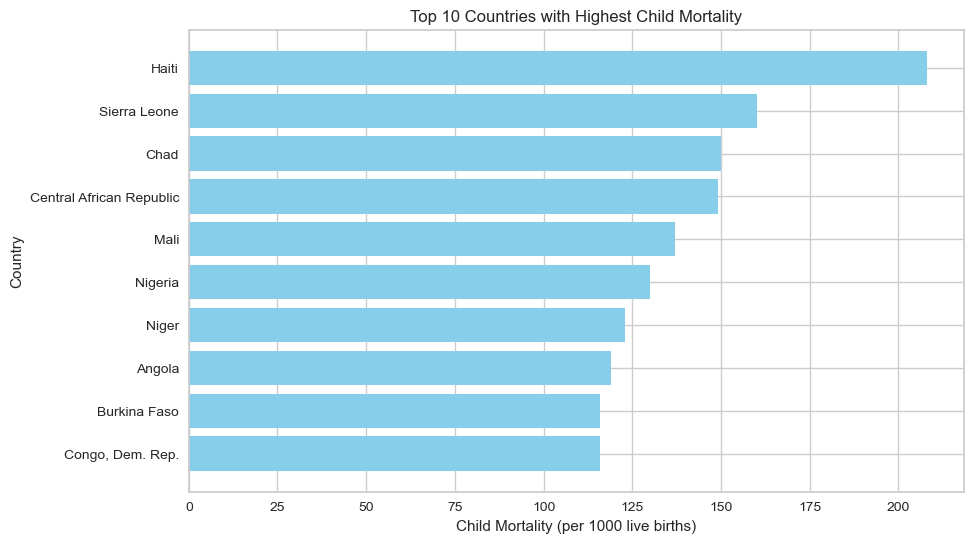

In [9]:
# visualisasi 1 (Child Mortality terbanyak berdasarkan negara)

# Mengurutkan dataframe berdasarkan child mortality secara menurun
df_sorted = df_ori.sort_values(by='child_mortality', ascending=False)

# Memilih 10 negara dengan child mortality tertinggi
top_10_countries = df_sorted.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['country'], top_10_countries['child_mortality'], color='skyblue')
plt.xlabel('Child Mortality (per 1000 live births)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Child Mortality')
plt.gca().invert_yaxis()  # Memutar sumbu y agar nilai terbesar berada di bagian atas
plt.show()

10 negara dengan kematian anak tertinggi yaitu:
1. Haiti, 
2. Sierra Leone, 
3. Chad, 
4. Central African Republic, 
5. Mali, 
6. Nigeria, 
7. NIger, 
8. Angola, 
9. Burkina Faso, 
10. Congo, Dem. Rep.

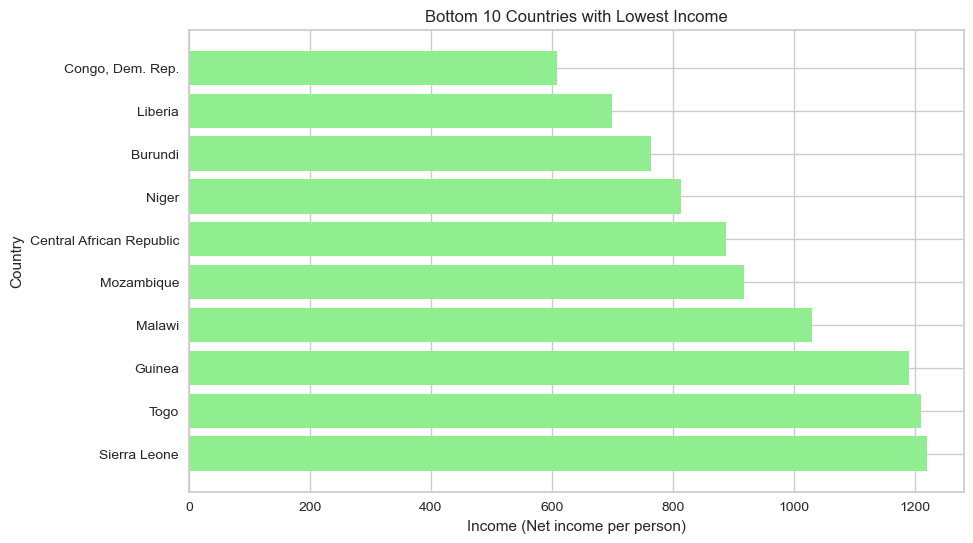

In [10]:
# Visualisasi 2 (Income terendah 10 negara)

# Mengurutkan dataframe berdasarkan income secara menaik
df_sorted = df_ori.sort_values(by='income', ascending=True)

# Memilih 10 negara dengan income terendah
bottom_10_countries = df_sorted.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_countries['country'], bottom_10_countries['income'], color='lightgreen')
plt.xlabel('Income (Net income per person)')
plt.ylabel('Country')
plt.title('Bottom 10 Countries with Lowest Income')
plt.gca().invert_yaxis()  # Memutar sumbu y agar nilai terkecil berada di bagian atas
plt.show()

10 negara dengan pendapatan terendah yaitu:
1. Congo, Dem. Rep.
2. Liberia
3. Burundi
4. Niger
5. Central African Republic
6. Mozambique
7. Malawi
8. Guinea
9. Togo
10. Sierra Leone

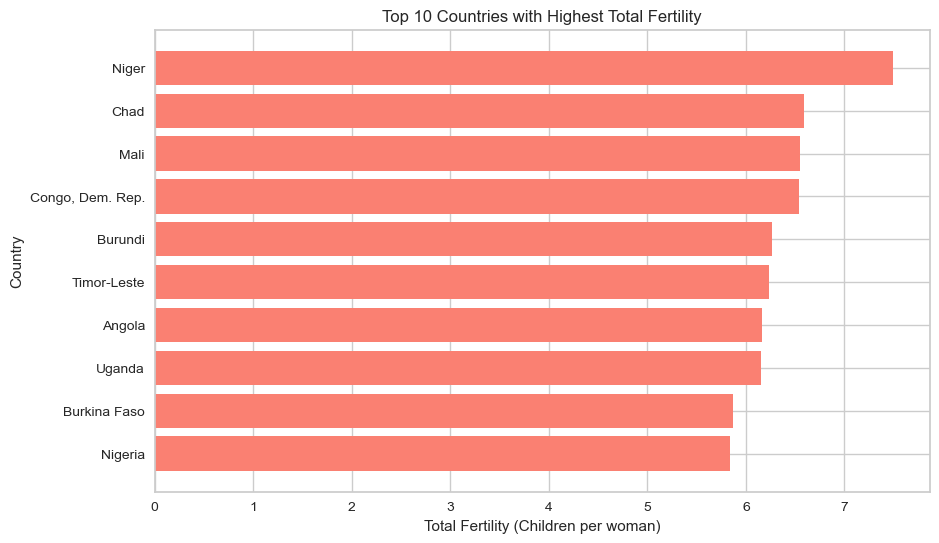

In [11]:
# visualisasi 3 (10 negara total fertility tertinggi)

# Mengurutkan dataframe berdasarkan total fertility secara menurun
df_sorted = df_ori.sort_values(by='total_fertility', ascending=False)

# Memilih 10 negara dengan total fertility tertinggi
top_10_fertility_countries = df_sorted.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_fertility_countries['country'], top_10_fertility_countries['total_fertility'], color='salmon')
plt.xlabel('Total Fertility (Children per woman)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Total Fertility')
plt.gca().invert_yaxis()  # Memutar sumbu y agar nilai tertinggi berada di bagian atas
plt.show()

10 negara dengan total kelahiran tertinggi yaitu:
1. Niger
2. Chad
3. Mali
4. Congo, Dem. Rep.
5. Burundi
6. Timor-Leste
7. Angola
8. Uganda
9. Burkina Faso
10. Nigeria

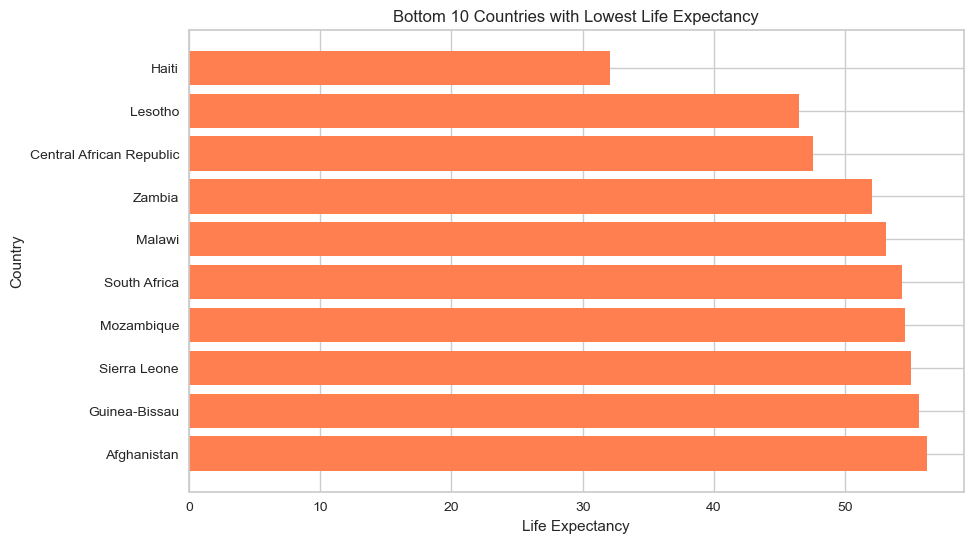

In [12]:
# visualisasi 4 
# Mengurutkan dataframe berdasarkan life_expectancy secara menaik
df_sorted = df_ori.sort_values(by='life_expectancy', ascending=True)

# Memilih 10 negara dengan life_expectancy terendah
bottom_10_life_expectancy = df_sorted.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_life_expectancy['country'], bottom_10_life_expectancy['life_expectancy'], color='coral')
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Bottom 10 Countries with Lowest Life Expectancy')
plt.gca().invert_yaxis()  # Memutar sumbu y agar nilai terendah berada di bagian atas
plt.show()

10 Negara dengan harapan hidup terendah:
1. Haiti
2. Lesotho
3. Zambia
4. Malawi
5. South Africa
6. Mozambique
7. Sierra Leone
8. Guinea-Bissau
9. Afghanistan
10. Cote d'Ivoire

Dari 4 visualisasi tersebut, negara yang sekiranya membutuhkan perhatian lebih adalah 
1. Congo, Dem. Rep.: Negara ini muncul dalam daftar kematian anak tertinggi dan pendapatan terendah. Ini menunjukkan adanya masalah serius dalam kesehatan dan kesejahteraan masyarakatnya, serta tantangan dalam pembangunan ekonomi.
2. Niger: Niger muncul dalam daftar kematian anak tertinggi dan total kelahiran tertinggi. Hal ini menunjukkan perlunya upaya untuk meningkatkan akses terhadap layanan kesehatan yang berkualitas serta program keluarga berencana yang efektif.
3. Central African Republic (CAR): Negara ini muncul dalam daftar kematian anak tertinggi, pendapatan terendah, dan harapan hidup terendah. CAR menghadapi banyak tantangan, termasuk konflik bersenjata yang berkepanjangan dan ketidakstabilan politik, yang telah berdampak negatif pada kondisi hidup masyarakatnya.

# v. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [13]:
# define random state agar selalu sama

random_state = 3

## Mengambil data inference dari data asli

In [14]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df_ori.sample(1, random_state=random_state)

# menghapus data inference dari df
df_ori.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df_ori.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menyimpan data_inf
data_inf.to_csv('data_inf.csv',index=False)

## Cek Duplikasi

In [15]:
# cek duplikasi sebelum drop duplikasi
df.duplicated().sum()

0

Tidak terdapat data duplikat. 

## Define Jenis Kolom

In [16]:
# define jenis kolom
num_cols= ['child_mortality', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expectancy', 'total_fertility', 'gdpp']
cat_cols= ['country'] 

# membuat df dari jenis kolom
df_num = df[num_cols]
df_cat = df[cat_cols]

Country merupakan kolom kategorikal dan yang lainnya adalah numerik.

## Handling Missing Value

In [17]:
# cek missing value
df.isnull().sum()

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

Tidak terdapat missing value.

## Handling Outlier

In [18]:
# melihat skew
df_num.skew()

child_mortality    1.450774
exports            2.445824
health             0.705746
imports            1.905276
income             2.231480
inflation          5.154049
life_expectancy   -0.970996
total_fertility    0.967092
gdpp               2.218051
dtype: float64

Dari hasil tersebut, kolom child_mortality, exports, imports, income, inflation, dan gdpp memiliki skew. Oleh karena itu akan didetect dengan tukey's rule dan dicapping dengan median.

In [19]:
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['child_mortality', 'exports', 'imports', 'income', 'inflation', 'gdpp']
for col in columns_to_cap_with_median:
    df_num[col] = replace_outliers_with_median(df_num[col])

# Tampilkan DataFrame df_num setelah penggantian outlier 
print(df_num)

     child_mortality  exports  health  imports   income  inflation  \
0               90.2     10.0    7.58     44.9   1610.0       9.44   
1               16.6     28.0    6.55     48.6   9930.0       4.49   
2               27.3     38.4    4.17     31.4  12900.0      16.10   
3              119.0     62.3    2.85     42.9   5900.0      22.40   
4               10.3     45.5    6.03     58.9  19100.0       1.44   
..               ...      ...     ...      ...      ...        ...   
162             29.2     46.6    5.25     52.7   2950.0       2.62   
163             17.1     28.5    4.91     17.6  16500.0       5.39   
164             23.3     72.0    6.84     80.2   4490.0      12.10   
165             56.3     30.0    5.18     34.4   4480.0      23.60   
166             83.1     37.0    5.89     30.9   3280.0      14.00   

     life_expectancy  total_fertility     gdpp  
0               56.2             5.82    553.0  
1               76.3             1.65   4090.0  
2           

In [20]:
# melihat skew setelah dihandling
df_num.skew()

child_mortality    1.197090
exports            0.584619
health             0.705746
imports            0.465036
income             1.114223
inflation          0.930986
life_expectancy   -0.970996
total_fertility    0.967092
gdpp               1.950258
dtype: float64

Setelah dihandling terlihat bahwa skew pada kolom sudah lebih mendekati normal dan bahkan ada yang normal.

## Scaling

Menggunakan standard scaler karena telah dihandling outlier

In [21]:
# Scaling the data using the StandardScaler method
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

## PCA

In [22]:
# melakukan PCA dengan df yang telah discaled
pca = PCA()
pca.fit(df_scaled)

PCA()

In [23]:
# Periksa jumlah fitur untuk menyimpan 95% informasi

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

7

Dari perhitungan tersebut, 7 feature adalah angka kolom yang dibutuhkan untuk menyimpan 95% informasi

In [24]:
# Let's train the model with 95 % of the original dataset information

pca_n = PCA(n_components=7) # n_components sesuai dengan perhitungan sebelumnya
pca_n.fit(df_scaled)

df_scaled_pca = pca_n.transform(df_scaled)

Kemudian ditrain dengan fitur yang sudah dihitung sebelumnya dan digabungkan menjadi dataframe baru.

In [25]:
# concate antara numerik dan categorical
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7']) # sesuai jumlah num_features
df_final = pd.concat([df_scaled_pca, df_cat], axis=1)

# Tampilkan DataFrame df_final
print(df_final)

         PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    3.290254  0.412601  1.094859  0.594023  0.264174  0.278200 -0.030009   
1   -0.627752  0.246941  0.181383 -1.106525 -0.404475  0.222410 -0.212129   
2    0.318129  0.555873 -1.815564 -0.539035  0.597687 -0.073250 -0.371423   
3    3.543342 -1.303090 -2.173603  1.458542  1.207255 -0.522138 -0.561175   
4   -1.625551 -0.668300  0.000475  0.110618 -0.757914  0.273758 -0.176045   
..        ...       ...       ...       ...       ...       ...       ...   
162  0.799714 -0.979620  0.207198 -0.386587 -0.797428 -0.010755  0.485337   
163 -0.784576  1.459720 -1.011615  0.422058 -0.874107  0.286746 -0.024493   
164 -0.293888 -2.532250 -0.462507 -1.261590  1.021845  0.172153 -0.381047   
165  2.387576  0.484998 -1.640539 -0.218277  1.629521  0.352826 -0.451676   
166  3.237166  0.001263 -0.409172  0.833539  0.625662 -0.040123  0.652971   

                 country  
0            Afghanistan  
1                Alba

In [26]:
# melihat info data setelah dilakukan PCA
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PCA1     167 non-null    float64
 1   PCA2     167 non-null    float64
 2   PCA3     167 non-null    float64
 3   PCA4     167 non-null    float64
 4   PCA5     167 non-null    float64
 5   PCA6     167 non-null    float64
 6   PCA7     167 non-null    float64
 7   country  167 non-null    object 
dtypes: float64(7), object(1)
memory usage: 10.6+ KB


Berikut adalah df_final yang sudah dilakukan PCA terdiri dari 167 baris dan 8 kolom, dimana 7 kolom PCA dan 1 kolom kategorikal.

# vi. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Menggunakan K-Means untuk mencari n cluster terbaik. Yang sebelumnya dilakukan beberapa tahapan untuk menentukannya.

## Elbow

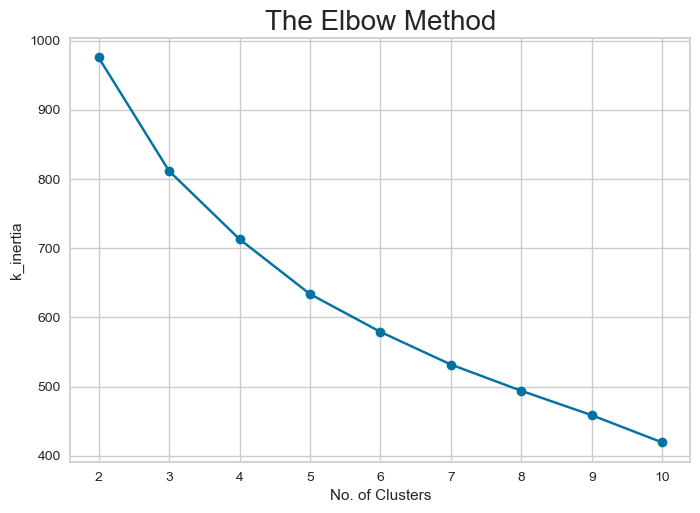

In [27]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
    km.fit(df_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Dari Elbow, secara subjektif saya menilai K terbaik adalah 7. Namun, untuk lebih jelasnya lagi saya akan menggunakan silhouette score dan silhouette plot yellow brick

## Silhouette_score

In [28]:
for n_clusters in range(2, 16):
  clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++',
                     max_iter = 300, n_init = 10,
                     random_state = random_state)
  cluster_labels = clusterer.fit_predict(df_scaled_pca)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters
  silhouette_avg = silhouette_score(df_scaled_pca, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2871589745873939
For n_clusters = 3 The average silhouette_score is : 0.21748634605732198
For n_clusters = 4 The average silhouette_score is : 0.21807065092427047
For n_clusters = 5 The average silhouette_score is : 0.23755024619498005
For n_clusters = 6 The average silhouette_score is : 0.23814934091521567
For n_clusters = 7 The average silhouette_score is : 0.22826223381261576
For n_clusters = 8 The average silhouette_score is : 0.23530664538925056
For n_clusters = 9 The average silhouette_score is : 0.2203303919911336
For n_clusters = 10 The average silhouette_score is : 0.24296717922891853
For n_clusters = 11 The average silhouette_score is : 0.24670660135422912
For n_clusters = 12 The average silhouette_score is : 0.23690573298799758
For n_clusters = 13 The average silhouette_score is : 0.22152161985405636
For n_clusters = 14 The average silhouette_score is : 0.21892778893519296
For n_clusters = 15 The average silhouette_score

Dari nilai score, yang terbaik adalah cluster sejumlah 2, namun untuk memastikan akan dilakukan visualisasi plot.

## Silhoutte Plot Yellow Brick

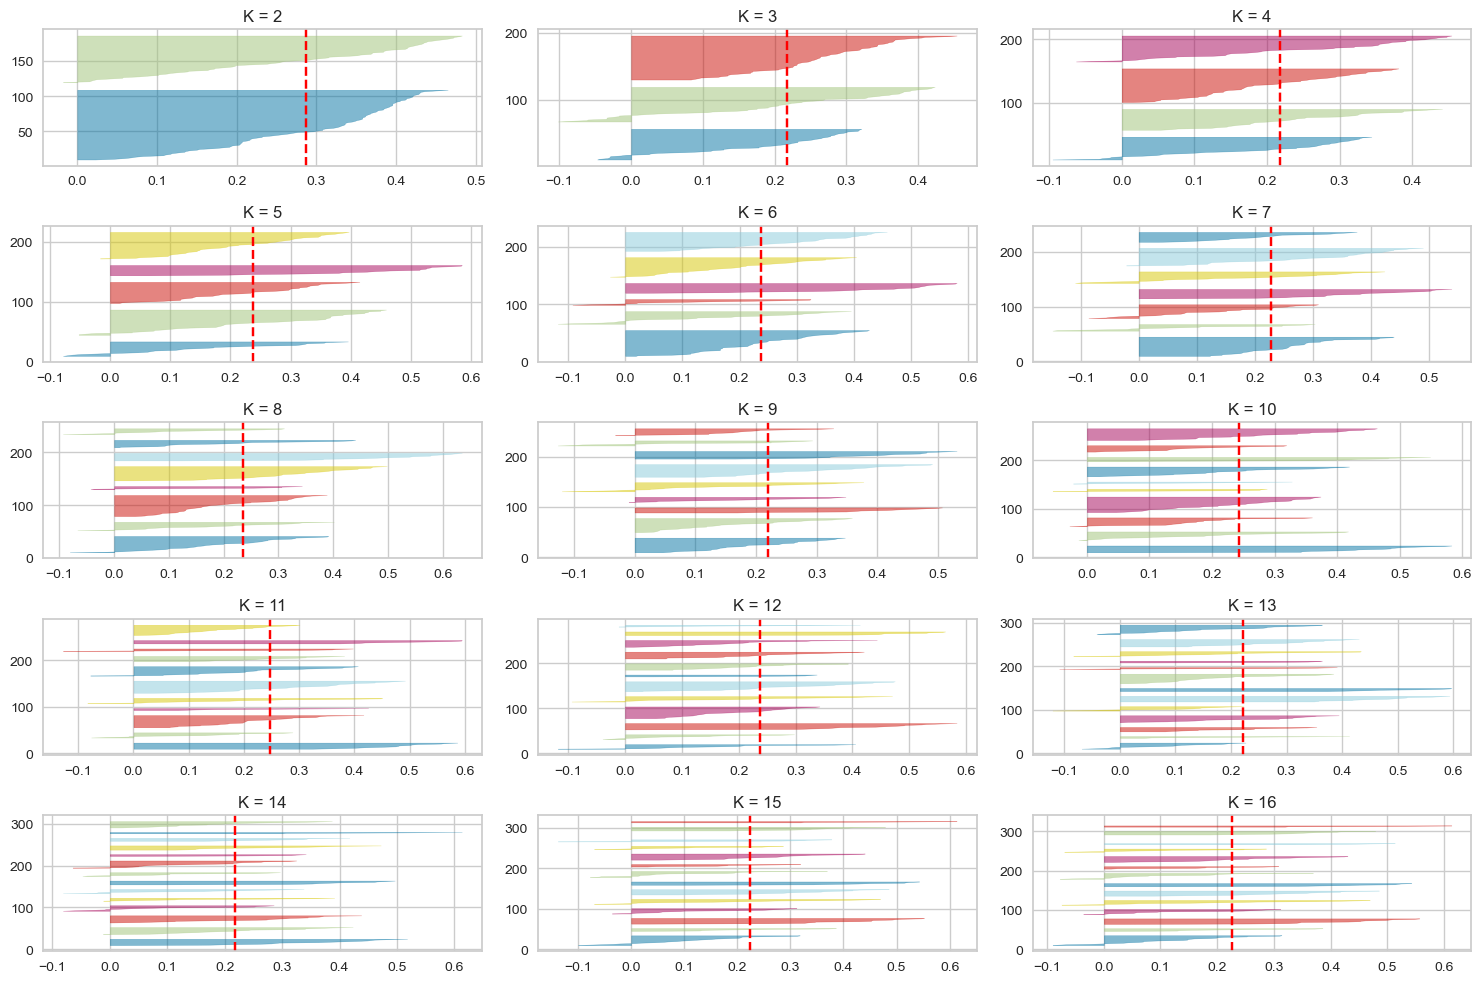

In [29]:
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Dari plot terlihat memang jumlah cluster 2 cukup baik, namun lebarnya tidak begitu rata. Sehingga saya kana memilih cluster berjumlah 3.

# vii. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [30]:
# Train with optimal number of clusters= 3

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

array([1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1,
       1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1])

Saya melakukan training KMeans dengan n_clusternya = 3.

# viii. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [31]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


Setelah cluster diinput, data menjadi 11 kolom

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
 10  cluster          167 non-null    int32  
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 13.8+ KB


Data setelah dilakukan clustering berjumlah 11 feature dengan 1 kategorikal feature yaitu country. Pengelompokan country akan dilihat dari clustering yang telah dilakukan.

## EDA setelah clustering (melihat karakteristik tiap cluster)

Melihat pembagian setiap cluster

<Axes: >

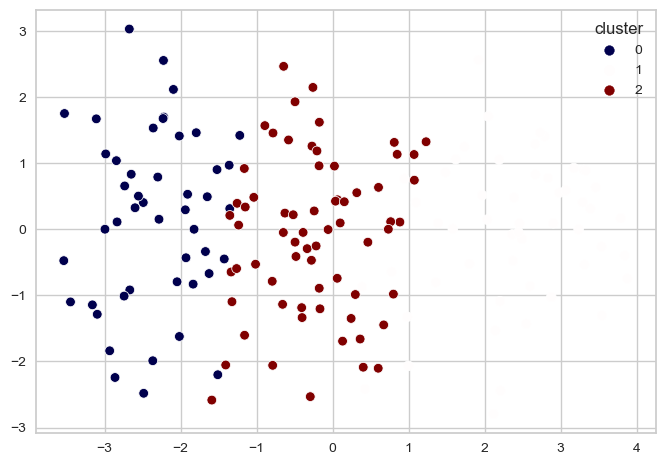

In [33]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=3)
pca_2d.fit(df_scaled_pca)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df['cluster'], palette='seismic')

In [34]:
# Jumlah data dalam cluster 0
jumlah_cluster_0 = df['cluster'].value_counts()[0]

# Jumlah data dalam cluster 1
jumlah_cluster_1 = df['cluster'].value_counts()[1]

# Jumlah data dalam cluster 2
jumlah_cluster_2 = df['cluster'].value_counts()[2]

print("Jumlah data dalam cluster 0:", jumlah_cluster_0)
print("Jumlah data dalam cluster 1:", jumlah_cluster_1)
print("Jumlah data dalam cluster 2:", jumlah_cluster_2)

Jumlah data dalam cluster 0: 47
Jumlah data dalam cluster 1: 53
Jumlah data dalam cluster 2: 67


Jumlah data negara tiap cluster terlihat tidak jauh berbeda. Berikut sekiranya adalah hasil nama-nama negara tiap cluster.

In [35]:
# negara tiap cluster
df.groupby('cluster')['country'].apply(list)

cluster
0    [Antigua and Barbuda, Australia, Austria, Baha...
1    [Afghanistan, Angola, Benin, Botswana, Burkina...
2    [Albania, Algeria, Argentina, Armenia, Azerbai...
Name: country, dtype: object

Namun, untuk lebih jelaskan akan dilihat berdasarkan feature tertentu agar dapat menyesuaikan negara prioritas yang memang butuh bantuan.

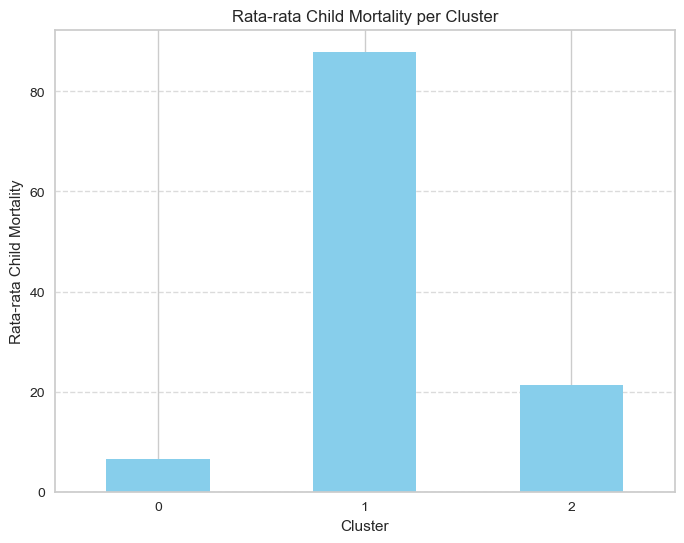

In [36]:
# Melakukan groupby berdasarkan kolom 'cluster' dan menghitung rata-rata child mortality untuk setiap cluster
cluster_means_child_mortality = df.groupby('cluster')['child_mortality'].mean()

# Membuat plot
plt.figure(figsize=(8, 6))
cluster_means_child_mortality.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Child Mortality per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Child Mortality')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
# melihat berdasarkan kematian anak
df.groupby(['cluster'])[['child_mortality']].mean()

,child_mortality
cluster,
0,6.534043
1,87.922642
2,21.255224


Dari kematian anak, cluster 1 paling tinggi.

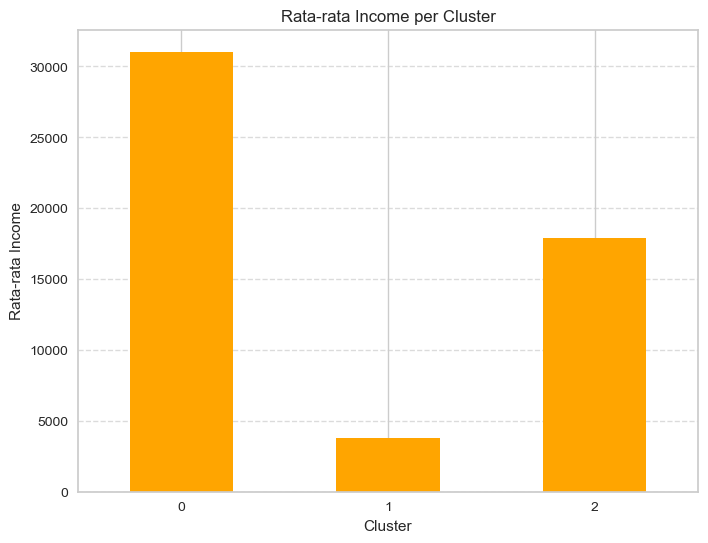

In [38]:
# Melakukan groupby berdasarkan kolom 'cluster' dan menghitung rata-rata income untuk setiap cluster
cluster_means_income = df.groupby('cluster')['income'].mean()

# Membuat plot
plt.figure(figsize=(8, 6))
cluster_means_income.plot(kind='bar', color='orange')
plt.title('Rata-rata Income per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Income')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
# melihat berdasarkan pendapatan
df.groupby(['cluster'])[['income']].mean()

,income
cluster,
0,31040.851064
1,3823.452830
2,17934.328358


Dari pendapatan, cluster 1 paling rendah.

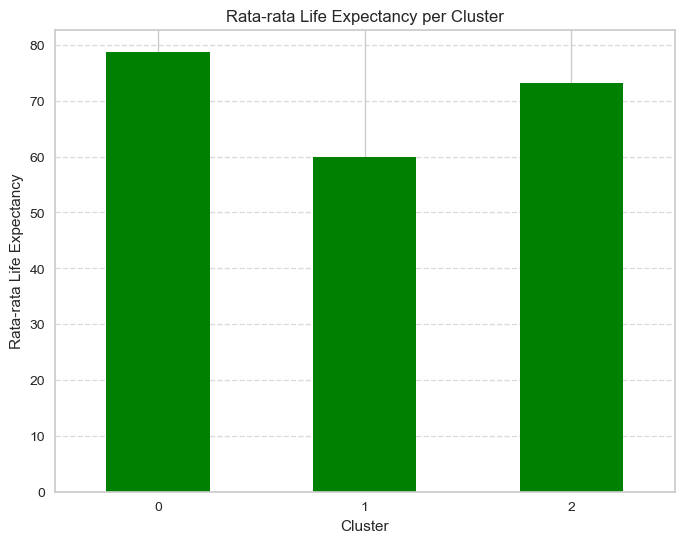

In [40]:
# Melakukan groupby berdasarkan kolom 'cluster' dan menghitung rata-rata life_expectancy untuk setiap cluster
cluster_means_life_expectancy = df.groupby('cluster')['life_expectancy'].mean()

# Membuat plot
plt.figure(figsize=(8, 6))
cluster_means_life_expectancy.plot(kind='bar', color='green')
plt.title('Rata-rata Life Expectancy per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Life Expectancy')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# melihat berdasarkan angka harapan hidup
df.groupby(['cluster'])[['life_expectancy']].mean()

,life_expectancy
cluster,
0,78.785106
1,59.996226
2,73.135821


Dari angka harapan hidup, cluster 1 paling rendah.

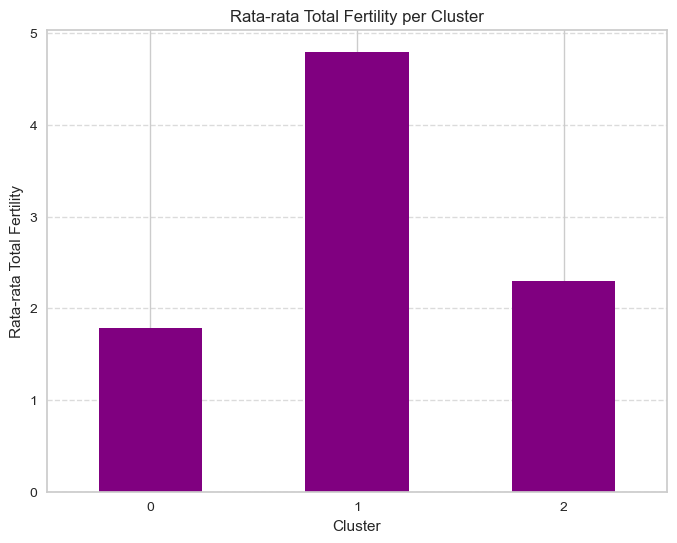

In [42]:
# Melakukan groupby berdasarkan kolom 'cluster' dan menghitung rata-rata total_fertility untuk setiap cluster
cluster_means_total_fertility = df.groupby('cluster')['total_fertility'].mean()

# Membuat plot
plt.figure(figsize=(8, 6))
cluster_means_total_fertility.plot(kind='bar', color='purple')
plt.title('Rata-rata Total Fertility per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Total Fertility')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
# melihat berdasarkan total kelahiran
df.groupby(['cluster'])[['total_fertility']].mean()

,total_fertility
cluster,
0,1.787021
1,4.796415
2,2.300149


Dari total kelahiran, cluster 1 paling tinggi. 
Saya juga akan melihat cluster negara yang sebelumnya perlu perhatian khusus (BAB EDA).

In [44]:
# Mencari cluster dari negara Congo, Dem. Rep.
cluster_Congo = df[df['country'] == 'Congo, Dem. Rep.']['cluster'].values[0]

print("Negara Congo, Dem. Rep. berada di cluster:", cluster_Congo)

Negara Congo, Dem. Rep. berada di cluster: 1


In [45]:
# Mencari cluster dari negara Niger
cluster_niger = df[df['country'] == 'Niger']['cluster'].values[0]

print("Negara Niger berada di cluster:", cluster_niger)

Negara Niger berada di cluster: 1


In [46]:
# Mencari cluster dari negara Central African Republic
cluster_CAR = df[df['country'] == 'Central African Republic']['cluster'].values[0]

print("Negara Sierra Leone berada di cluster:", cluster_CAR)

Negara Sierra Leone berada di cluster: 1


Jika dilihat memang cluster 1 merupakan negara prioritas memerlukan bantuan. 

In [47]:
# melihat nama negara di cluster 1
cluster_1_countries = df[df['cluster'] == 1]

# Menampilkan negara-negara dengan cluster 1
print(cluster_1_countries[['country', 'cluster']])


                      country  cluster
0                 Afghanistan        1
3                      Angola        1
17                      Benin        1
21                   Botswana        1
25               Burkina Faso        1
26                    Burundi        1
28                   Cameroon        1
31   Central African Republic        1
32                       Chad        1
36                    Comoros        1
37           Congo, Dem. Rep.        1
38                Congo, Rep.        1
40              Cote d'Ivoire        1
49          Equatorial Guinea        1
50                    Eritrea        1
55                      Gabon        1
56                     Gambia        1
59                      Ghana        1
63                     Guinea        1
64              Guinea-Bissau        1
66                      Haiti        1
69                      India        1
72                       Iraq        1
80                      Kenya        1
81                   Kiri

Berikut data yang ditampilkan merupakan negara-negara dengan cluster 1 diantaranya afghanistan, angola, benin.

# ix. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [48]:
# Save file model 
with open('model.pkl', 'wb') as file_1: 
  pickle.dump(km, file_1)

# Save file hasil model scaler
with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

# Save file hasil pca
with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

# Save file teks num_col
with open('num_col.txt', 'w') as file_4:
  json.dump(num_cols, file_4)

# Save file teks cat_col
with open('cat_col.txt', 'w') as file_5:
  json.dump(cat_cols, file_5)

# x. Model Inference (different notebook)
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Terdapat dalam notebook "model_inference.ipynb"

# xi. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan Keseluruhan
Berdasarkan analisis dan pemodelan menggunakan algoritma KMeans untuk melakukan pengelompokkan negara-negara berdasarkan atribut ekonomi dan kesehatan, serta penelusuran terhadap negara-negara dengan kondisi paling rentan sebelum dan setelah clustering, dapat dismpulkan bahwa:
- **Cluster 1 sebagai Prioritas Utama:** Hasil clustering menunjukkan bahwa negara-negara dalam Cluster 1 memiliki karakteristik yang menunjukkan tingkat kemiskinan dan masalah kesehatan yang serius. Hal ini tercermin dari kematian anak yang tinggi, pendapatan yang rendah, harapan hidup yang rendah, dan total kelahiran yang tinggi.
- **Negara-Negara Prioritas:** Dengan mempertimbangkan hasil clustering dan penelusuran terhadap negara-negara yang membutuhkan perhatian khusus sebelumnya, seperti Congo, Dem. Rep., Niger, dan Sierra Leone, saya merekomendasikan negara-negara ini yaitu cluster 1 sebagai prioritas utama untuk mendapatkan bantuan.
- **Penggunaan Dana:** Dana sebesar $10 juta yang terkumpul dapat dialokasikan untuk program-program bantuan yang bertujuan untuk meningkatkan kesehatan, kesejahteraan, dan kemampuan ekonomi negara-negara dalam Cluster 1. Ini dapat mencakup penyediaan layanan kesehatan dasar, program keluarga berencana, program pemberdayaan ekonomi masyarakat, serta dukungan untuk infrastruktur dasar.
- **Strategi Kemanusiaan dan Pembangunan:**LSM dapat mengadopsi pendekatan yang holistik dalam memberikan bantuan, mengintegrasikan program-program kesehatan, pendidikan, pembangunan ekonomi, dan pemberdayaan masyarakat untuk memberikan dampak yang berkelanjutan dalam memerangi kemiskinan dan meningkatkan kualitas hidup masyarakat yang paling rentan.

Dengan fokus pada negara-negara dalam Cluster 1 dan pengalokasian dana yang tepat, LSM dapat berkontribusi secara signifikan dalam upaya memerangi kemiskinan dan meningkatkan kesejahteraan di negara-negara yang paling membutuhkan bantuan.

## Further Improvement
- Melihat feature lainnya untuk menilai setiap clustering
- Mencoba menggunakan jumlah cluster lain untuk melihat apakah lebih merepresentasikan atau tidak